# ANN & Fashion MNIST
---
By Margaret Maynard-Reid, 4/24/2018

![alt text](https://github.com/margaretmz/deep-learning/blob/master/images/modern%20dl_fash-mnist_keras.png?raw=1)

## Why Fashion-MNIST?


*   MNIST is too easy
*   MNIST is overused
*   MNIST can not represent modern Computer Vision tasks

Read more about the Fashion-MINST dataset in this paper [here](https://arxiv.org/abs/1708.07747) (**Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms**)



In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

4422102/4422102 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28) y_train shape: (60000,)


## Visualize the data 반복실행 해보자

x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set
y = 2 Pullover


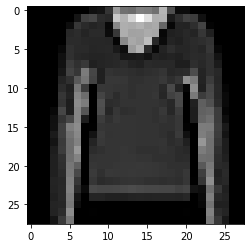

In [3]:
# Print training set shape - note there are 60,000 training data of image size of 28x28, 60,000 train labels)
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training and test datasets
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

# Image index, you can pick any number between 0 and 59,999
img_index = np.random.randint(0, 59999)
# y_train contains the lables, ranging from 0 to 9
label_index = y_train[img_index]
# Print the label, for example 2 Pullover
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
# # Show one of the images from the training dataset
plt.imshow(x_train[img_index], cmap = "gray")

In [4]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
#reshape를 사용안하고 modeling 과정에서 해결했으면 좋겠다?

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


##  코딩 task!

1. 전처리
    * x : sc_____
    * y : _______ encoding

2. 모델링
    * model에 모델 선언
    * Input layer에 어떻게 전달할 것인지 고민 필요
    * 쭈우우우욱 늘려주는 레이어를 사용할 것 (F______)
    * 히든레이어는 최소 3개를 쓸 것!
    * 노드 수는 512개를 기본으로 시작
    * 자유롭게 바꿔가며 성능을 볼 것

3. 학습
    * epochs=50, validation_split=0.2
    * early stopping

In [5]:
#############
# Your Code #
#############
max_n, min_n = x_train.max(), x_train.min()
max_n, min_n

(255, 0)

In [6]:
x_train = (x_train - min_n) / (max_n - min_n)
x_test = (x_test - min_n) / (max_n - min_n)

In [7]:
x_train.max(), x_train.min()

(1.0, 0.0)

In [8]:
from tensorflow.keras.utils import to_categorical
set(y_train) #각 클래스는 의류를 의미
y_train.shape

(60000,)

In [9]:
len_y = len(set(y_train))
y_train.shape

(60000,)

In [10]:
y_train = to_categorical(y_train, len_y)
y_test = to_categorical(y_test, len_y)

In [11]:
y_train.shape

(60000, 10)

In [12]:
#########################
# 모델링 II : .fit( ) 까지!
#########################
#1. 세션 클리어
keras.backend.clear_session()

#2. 모델 선언
model = keras.models.Sequential()

#3. 모델 블록 조립
model.add(keras.layers.Input(shape = (28, 28)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation = "relu"))
model.add(keras.layers.Dense(512, activation = "relu"))
model.add(keras.layers.Dense(512, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))

#4. 컴파일
model.compile(loss = "categorical_crossentropy", metrics = ["accuracy"], optimizer = "adam")

#5. 요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 932,362
Trainable params: 932,362
Non-trainable params: 0
_________________________________________________________________


In [13]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor = "val_loss",    #관측 대상
                            min_delta = 0,
                            patience = 5,
                            verbose = 1,
                            restore_best_weights = True) #최적 epoch의 가중치 적용

In [14]:
model.fit(x_train, y_train, validation_split = 0.2, callbacks = [es], verbose = 1, epochs = 100)

Epoch 1/100
1500/1500 [==============================] - 11s 4ms/step - loss: 0.4948 - accuracy: 0.8205 - val_loss: 0.4199 - val_accuracy: 0.8483
Epoch 2/100
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3775 - accuracy: 0.8620 - val_loss: 0.4031 - val_accuracy: 0.8435
Epoch 3/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3327 - accuracy: 0.8767 - val_loss: 0.3428 - val_accuracy: 0.8748
Epoch 4/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3148 - accuracy: 0.8837 - val_loss: 0.3539 - val_accuracy: 0.8727
Epoch 5/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2942 - accuracy: 0.8907 - val_loss: 0.3426 - val_accuracy: 0.8841
Epoch 6/100
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2770 - accuracy: 0.8966 - val_loss: 0.3593 - val_accuracy: 0.8786
Epoch 7/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2676 - accuracy: 0.8999 - val_loss: 0.3172 - val_a

## Visualize prediction

위에서 지키라고 한 사항들 안지키면 동작을 안할껄...?

In [15]:
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])
y_hat = model.predict(x_test).argmax(axis=1)


 Test accuracy: 0.878600001335144
313/313 [==============================] - 1s 2ms/step


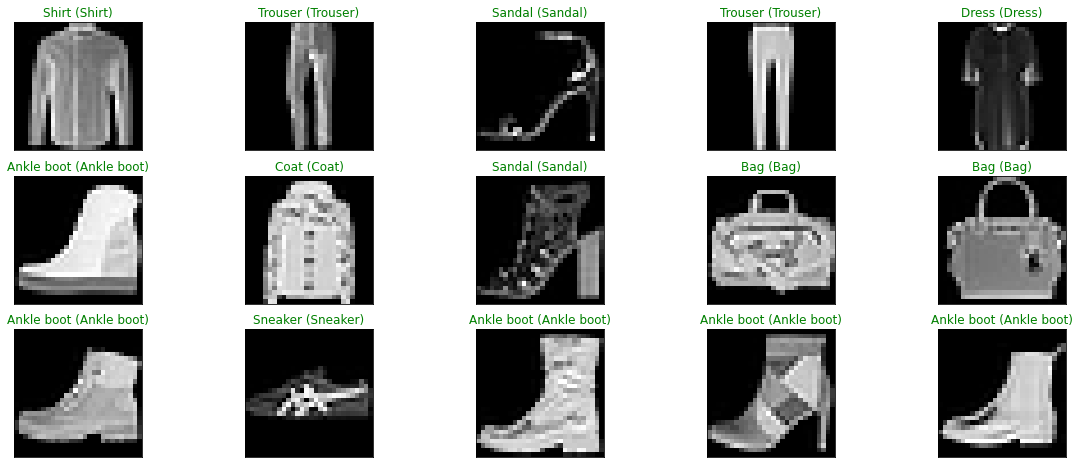

In [ ]:
# 15개의 랜덤한 테스트 이미지, 예측 라벨, 실제 라벨을 플롯
figure = plt.figure(figsize=(20, 8))

# 테스트 데이터셋에서 랜덤하게 15개의 인덱스를 추출하고 각각의 이미지를 처리
for i, index in enumerate(np.random.choice(x_test.shape[0], size = 15, replace = False)):
    # 15개의 이미지를 위한 subplot을 만듦
    ax = figure.add_subplot(3, 5, i + 1, xticks = [], yticks = [])
    
    # 이미지를 subplot에 표시
    ax.imshow(np.squeeze(x_test[index].reshape([28, -1])), cmap = "gray")
    
    # 해당 이미지의 예측 라벨과 실제 라벨을 가져옴
    predict_index = y_hat[index]
    true_index = y_test[index].argmax(axis = 0)
    
    # 예측 라벨과 실제 라벨을 기반으로 이미지 제목을 설정
    # 예측 라벨과 실제 라벨이 일치하면 초록색, 일치하지 않으면 빨간색으로 표시
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color = ("green" if predict_index == true_index else "red"))